
# Melhoria do Atendimento ao Cliente / *Customer Service Improvement*

# Desafio de Ciência de Dados / *Data Science Challenge*

# Entrega / *Delivery*: Notebook

# Desenvolvedor / *Developer*: Solano Jacon

In [1]:
import pyodbc
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import math
import warnings

warnings.filterwarnings('ignore')

## Conexão com a Base de Dados e Importação das Tabelas Relevantes / *Database Connection and Import of Relevant Tables*

In [2]:
# conn = pyodbc.connect("DRIVER={SQL Server};"
#                       "SERVER=<server>;"
#                       "DATABASE=<database>;"
#                       "UID=<UID>;"
#                       "PWD=<password>;")

In [3]:
# %%time

# chamado_bruto_df = pd.read_sql_query('SELECT * FROM Chamado', conn)

In [4]:
# %%time

# chamado_interacao_bruto_df = pd.read_sql_query('SELECT * FROM Chamado_Interacao', conn)

In [5]:
# %%time

# tarefa_bruto_df = pd.read_sql_query('SELECT * FROM Tarefa', conn)

In [6]:
# %%time

# prioridade_bruto_df = pd.read_sql_query('SELECT * FROM Prioridade', conn)

In [7]:
# %%time

# chamado_tipo_bruto_df = pd.read_sql_query('SELECT * FROM Chamado_Tipo', conn)

In [8]:
# %%time

# sistema_bruto_df = pd.read_sql_query('SELECT * FROM Sistema', conn)

In [9]:
# chamado_bruto_df.to_csv('../../portfolio-data/Customer_Service_Improvement/data/chamado.csv', index=False)
# chamado_interacao_bruto_df.to_csv('../../portfolio-data/Customer_Service_Improvement/data/chamado_interacao.csv', index=False)
# tarefa_bruto_df.to_csv('../../portfolio-data/Customer_Service_Improvement/data/tarefa.csv', index=False)
# prioridade_bruto_df.to_csv('../../portfolio-data/Customer_Service_Improvement/data/prioridade.csv', index=False)
# chamado_tipo_bruto_df.to_csv('../../portfolio-data/Customer_Service_Improvement/data/chamado_tipo.csv', index=False)
# sistema_bruto_df.to_csv('../../portfolio-data/Customer_Service_Improvement/data/sistema.csv', index=False)

In [10]:
chamado_bruto_df = pd.read_csv('../../portfolio-data/Customer_Service_Improvement/data/chamado.csv')
chamado_interacao_bruto_df = pd.read_csv('../../portfolio-data/Customer_Service_Improvement/data/chamado_interacao.csv')
tarefa_bruto_df = pd.read_csv('../../portfolio-data/Customer_Service_Improvement/data/tarefa.csv')
prioridade_bruto_df = pd.read_csv('../../portfolio-data/Customer_Service_Improvement/data/prioridade.csv')
chamado_tipo_bruto_df = pd.read_csv('../../portfolio-data/Customer_Service_Improvement/data/chamado_tipo.csv')
sistema_bruto_df = pd.read_csv('../../portfolio-data/Customer_Service_Improvement/data/sistema.csv')

## Considerações Iniciais / *Initial considerations*

- Serão analisandos apenas os chamados concluídos, pois apresentam histórico completo e dados definitivos.
- Apesar da base de dados apresentar os últimos 10 anos de histórico de chamados, serão analisados apenas os chamados concluídos nos últimos 3 anos, pois estamos interessados na situação atual do processo de atendimento de chamados.
- Os indicadores TMA, NPS e FCR que serão mencionados a seguir são indicadores padrão de mercado.


- *Only completed tickets will be analyzed, as they have a complete history and definitive data.*
- *Although the database presents the last 10 years of ticket history, only tickets completed in the last 3 years will be analyzed, as we are interested in the current situation of the ticket handling process.*
- *The TMA, NPS and FCR indicators that will be mentioned below are standard market indicators.*

## Indicadores Utilizados na Análise / *Indicators Used in Analysis*

**Atendimento na Data Prevista (ADP) / *Service on the Expected Date (ADP)***

ADP = (quantidade de chamados/interações/tarefas não concluídos na data/prazo previstos) / (quantidade de chamados/interações/tarefas)

*ADP = (number of tickets/interactions/tasks not completed on the expected date/deadline) / (number of tickets/interactions/tasks)*

**Tempo Médio de Atendimento (TMA) / *Average Service Time (TMA)***

TMA = (soma das diferenças de tempo em dias entre a abertura e a conclusão dos chamados) / (quantidade de chamados)

*TMA = (sum of time differences in days between opening and closing of tickets) / (number of tickets)*

## Filtragem Geral dos Dados / *General Data Filtering*

- Seleção dos colunas relevantes
- Seleção dos chamados concluídos nos últimos 3 anos


- *Selection of relevant fields*
- *Selection of tickets completed in the last 3 years*

In [11]:
chamado_df = chamado_bruto_df.copy()
chamado_interacao_df = chamado_interacao_bruto_df.copy()
tarefa_df = tarefa_bruto_df.copy()
prioridade_df = prioridade_bruto_df.copy()
chamado_tipo_df = chamado_tipo_bruto_df.copy()
sistema_df = sistema_bruto_df.copy()

In [12]:
chamado_df.columns

Index(['id_chamado', 'id_sistema', 'id_chamado_tipo', 'id_chamado_categoria',
       'id_chamado_subcategoria', 'id_usuario', 'id_usuario_solicitante',
       'id_cliente', 'id_chamado_status', 'id_prioridade', 'dt_abertura',
       'dt_previsao_conclusao_etapa', 'dt_conclusao_etapa', 'assunto',
       'id_usuario_responsavel', 'id_tempo_execucao',
       'dt_previsao_conclusao_chamado', 'dt_conclusao_chamado',
       'id_diagnostico', 'id_responsabilidade', 'id_motivo',
       'tempo_decorrido_chamado', 'apoio', 'id_usuario_dono'],
      dtype='object')

In [13]:
len(chamado_df)

32858

In [14]:
chamado_interacao_df.columns

Index(['id_chamado_interacao', 'id_chamado', 'id_usuario_de', 'descricao',
       'dt_interacao', 'interno', 'lido', 'dt_previsao_conclusao',
       'dt_conclusao', 'interacao_manual'],
      dtype='object')

In [15]:
len(chamado_interacao_df)

602230

In [16]:
tarefa_df.columns

Index(['id_tarefa', 'id_chamado', 'id_sistema', 'id_chamado_categoria',
       'id_chamado_subcategoria', 'id_usuario', 'id_usuario_responsavel',
       'id_tarefa_atividade', 'id_prioridade', 'id_tarefa_status',
       'id_motivo_dt_fim', 'id_motivo_duracao_estimada', 'titulo', 'descricao',
       'dt_prev_inicio', 'dt_prev_fim', 'duracao_estimada', 'dt_inicio',
       'dt_fim', 'tempo_decorrido', 'retrabalho', 'dt_inclusao',
       'dt_alteracao'],
      dtype='object')

In [17]:
len(tarefa_df)

25845

In [18]:
prioridade_df.columns

Index(['id_prioridade', 'prioridade', 'nivel'], dtype='object')

In [19]:
len(prioridade_df)

3

In [20]:
chamado_tipo_df.columns

Index(['id_chamado_tipo', 'tipo'], dtype='object')

In [21]:
len(chamado_tipo_df)

13

In [22]:
sistema_df.columns

Index(['id_sistema', 'sistema', 'enviar_emails'], dtype='object')

In [23]:
len(sistema_df)

28

**Tabelas e Colunas Mais Relevantes / *Most Relevant Tables and Fields***

**tabela / *table*: Chamado**
- colunas / *fields*: id_chamado | id_sistema | id_chamado_tipo | id_prioridade | dt_abertura | dt_previsao_conclusao_chamado | dt_conclusao_chamado

**tabela / *table*: Chamado_Interacao**
- colunas / *fields*: id_chamado_interacao | id_chamado | dt_previsao_conclusao | dt_conclusao

**tabela / *table*: Tarefa**
- colunas / *fields*: id_tarefa | id_chamado | dt_prev_inicio | dt_prev_fim | dt_inicio | dt_fim | retrabalho

**tabela / *table*: Prioridade**
- colunas / *fields*: id_prioridade | prioridade | nivel (todos / *all*)

**tabela / *table*: Chamado_Tipo**
- colunas / *fields*: id_chamado_tipo | tipo (todos / *all*)

**tabela / *table*: Sistema**
- colunas / *fields*: id_sistema | sistema

In [24]:
chamado_df = chamado_df[['id_chamado', 'id_sistema', 'id_chamado_tipo', 'id_prioridade', 'dt_abertura', 'dt_previsao_conclusao_chamado', 'dt_conclusao_chamado']]
chamado_interacao_df = chamado_interacao_df[['id_chamado_interacao', 'id_chamado', 'dt_previsao_conclusao', 'dt_conclusao']]
tarefa_df = tarefa_df[['id_tarefa', 'id_chamado', 'dt_prev_inicio', 'dt_prev_fim', 'dt_inicio', 'dt_fim', 'retrabalho']]
sistema_df = sistema_df[['id_sistema', 'sistema']]

In [25]:
chamado_df['dt_abertura'] = pd.to_datetime(chamado_df['dt_abertura'])
chamado_df['dt_previsao_conclusao_chamado'] = pd.to_datetime(chamado_df['dt_previsao_conclusao_chamado'])
chamado_df['dt_conclusao_chamado'] = pd.to_datetime(chamado_df['dt_conclusao_chamado'])

chamado_interacao_df['dt_previsao_conclusao'] = pd.to_datetime(chamado_interacao_df['dt_previsao_conclusao'])
chamado_interacao_df['dt_conclusao'] = pd.to_datetime(chamado_interacao_df['dt_conclusao'])

tarefa_df['dt_prev_inicio'] = pd.to_datetime(tarefa_df['dt_prev_inicio'])
tarefa_df['dt_prev_fim'] = pd.to_datetime(tarefa_df['dt_prev_fim'])
tarefa_df['dt_inicio'] = pd.to_datetime(tarefa_df['dt_inicio'])
tarefa_df['dt_fim'] = pd.to_datetime(tarefa_df['dt_fim'])

In [26]:
chamado_df = chamado_df.dropna(subset=['dt_conclusao_chamado'])
chamado_df = chamado_df.loc[chamado_df['dt_conclusao_chamado'] >= (datetime.datetime.now() - datetime.timedelta(days=(365 * 3)))]
chamado_interacao_df = chamado_interacao_df.merge(chamado_df[['id_chamado', 'id_prioridade']], on='id_chamado')
tarefa_df = tarefa_df.merge(chamado_df[['id_chamado', 'id_prioridade']], on='id_chamado')

In [27]:
chamado_df

,id_chamado,id_sistema,id_chamado_tipo,id_prioridade,dt_abertura,dt_previsao_conclusao_chamado,dt_conclusao_chamado
27456,28649,1,5,3.0,2019-12-05 08:17:30.313,NaT,2021-03-06 05:00:03.910
28034,29227,2,5,2.0,2020-02-06 11:52:38.463,NaT,2021-03-11 15:07:05.000
29776,30969,27,12,2.0,2020-07-06 18:11:39.693,2020-09-11 18:00:00,2021-03-06 05:00:09.823
31758,32951,2,10,2.0,2020-12-03 16:39:37.357,2021-02-12 18:00:00,2021-03-12 05:00:04.467
31917,33110,1,5,3.0,2020-12-16 11:54:21.670,NaT,2021-03-06 05:00:02.463
...,...,...,...,...,...,...,...
32837,34030,1,5,3.0,2021-03-15 19:04:39.270,NaT,2021-03-16 15:20:39.000
32844,34037,2,5,3.0,2021-03-16 10:55:42.037,NaT,2021-03-16 12:32:54.000
32845,34038,2,5,NaN,2021-03-16 11:32:19.410,NaT,2021-03-16 15:15:50.000
32846,34039,1,5,NaN,2021-03-16 11:54:00.857,NaT,2021-03-16 15:15:27.000


In [28]:
chamado_interacao_df

,id_chamado_interacao,id_chamado,dt_previsao_conclusao,dt_conclusao,id_prioridade
0,494001,28649,NaT,NaT,3.0
1,494002,28649,2019-12-05 08:17:19,2019-12-05 08:17:19,3.0
2,494003,28649,2019-12-05 08:17:26,2019-12-05 08:17:26,3.0
3,494004,28649,2019-12-05 08:17:52,2019-12-05 08:17:52,3.0
4,494005,28649,2019-12-05 08:18:04,2019-12-05 08:18:04,3.0
...,...,...,...,...,...
2595,607299,34040,2021-03-16 16:08:07,2021-03-16 16:08:07,NaN
2596,607342,34040,2021-03-16 17:31:35,2021-03-16 17:31:35,NaN
2597,607344,34040,NaT,NaT,NaN
2598,607345,34040,2021-03-16 17:33:10,2021-03-16 17:33:10,NaN


In [29]:
tarefa_df

,id_tarefa,id_chamado,dt_prev_inicio,dt_prev_fim,dt_inicio,dt_fim,retrabalho,id_prioridade
0,14913,29227,2020-05-19 09:00:00,2020-05-20 18:00:00,2020-05-19 08:52:47,2020-05-19 09:23:47,False,2.0
1,16980,30969,2020-07-17 11:50:00,2020-07-17 14:00:00,2020-07-17 11:45:00,2020-07-17 12:22:29,False,2.0
2,17059,30969,2020-07-20 17:00:00,2020-07-20 18:00:00,2020-07-20 16:53:21,2020-07-20 18:39:12,False,2.0
3,17251,30969,2020-07-24 09:15:00,2020-07-24 18:00:00,2020-07-24 09:17:25,2020-07-24 10:00:56,False,2.0
4,17480,30969,2020-07-30 15:50:00,2020-07-30 17:30:00,2020-07-30 15:51:58,2020-07-30 17:31:43,False,2.0
...,...,...,...,...,...,...,...,...
90,26489,33953,2021-03-09 10:23:00,2021-03-09 11:30:00,2021-03-09 10:23:00,2021-03-09 11:27:00,False,3.0
91,26637,33936,2021-03-11 12:11:00,2021-03-11 13:30:00,2021-03-11 12:10:00,2021-03-12 08:09:00,False,NaN
92,26642,33978,2021-03-11 13:45:00,2021-03-11 14:20:00,2021-03-11 13:45:00,2021-03-11 14:16:00,False,3.0
93,26720,33980,2021-03-12 14:47:00,2021-03-12 16:00:00,2021-03-12 14:47:00,2021-03-12 16:00:00,False,3.0


In [30]:
prioridade_df

,id_prioridade,prioridade,nivel
0,1,Crítico,3
1,2,Normal,1
2,3,Urgente,2


In [31]:
chamado_tipo_df

,id_chamado_tipo,tipo
0,1,Tipo 1
1,10,Tipo 10
2,1001,Tipo 1001
3,11,Tipo 11
4,12,Tipo 12
5,2,Tipo 2
6,3,Tipo 3
7,4,Tipo 4
8,5,Tipo 5
9,6,Tipo 6


In [32]:
sistema_df

,id_sistema,sistema
0,1,Sistema 1
1,2,Sistema 2
2,3,Sistema 3
3,4,Sistema 4
4,5,Sistema 5
5,6,Sistema 6
6,8,Sistema 8
7,9,Sistema 9
8,10,Sistema 10
9,11,Sistema 11


## Análise Geral dos Dados / *General Data Analysis*

- Verificação de colunas vazios ou com conteúdo que pode prejudicar as análises


- *Checking for empty fields or with content that can spoil the analysis*

In [33]:
chamado_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110 entries, 27456 to 32847
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   id_chamado                     110 non-null    int64         
 1   id_sistema                     110 non-null    int64         
 2   id_chamado_tipo                110 non-null    int64         
 3   id_prioridade                  101 non-null    float64       
 4   dt_abertura                    110 non-null    datetime64[ns]
 5   dt_previsao_conclusao_chamado  6 non-null      datetime64[ns]
 6   dt_conclusao_chamado           110 non-null    datetime64[ns]
dtypes: datetime64[ns](3), float64(1), int64(3)
memory usage: 6.9 KB


In [34]:
print('QUANTIDADE E PERCENTUAL DE CHAMADOS COM A COLUNA dt_previsao_conclusao_chamado VAZIA:\n',
      'QUANTITY AND PERCENTAGE OF TICKETS WITH THE EMPTY COLUMN dt_previsao_conclusao_chamado:\n',
      chamado_df['dt_previsao_conclusao_chamado'].isnull().sum(), 'CHAMADOS / TICKETS\n',
      round((chamado_df['dt_previsao_conclusao_chamado'].isnull().sum() / len(chamado_df)) * 100, 1), '% DOS CHAMADOS / % OF TICKETS')

QUANTIDADE E PERCENTUAL DE CHAMADOS COM A COLUNA dt_previsao_conclusao_chamado VAZIA:
 QUANTITY AND PERCENTAGE OF TICKETS WITH THE EMPTY COLUMN dt_previsao_conclusao_chamado:
 104 CHAMADOS / TICKETS
 94.5 % DOS CHAMADOS / % OF TICKETS


In [35]:
chamado_interacao_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2600 entries, 0 to 2599
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   id_chamado_interacao   2600 non-null   int64         
 1   id_chamado             2600 non-null   int64         
 2   dt_previsao_conclusao  1425 non-null   datetime64[ns]
 3   dt_conclusao           1660 non-null   datetime64[ns]
 4   id_prioridade          2437 non-null   float64       
dtypes: datetime64[ns](2), float64(1), int64(2)
memory usage: 121.9 KB


In [36]:
print('QUANTIDADE E PERCENTUAL DE INTERAÇÕES DOS CHAMADOS COM A COLUNA dt_conclusao VAZIA:\n',
      'QUANTITY AND PERCENTAGE OF INTERACTIONS OF TICKETS WITH THE EMPTY COLUMN dt_conclusao:\n',
      chamado_interacao_df['dt_conclusao'].isnull().sum(), 'INTERAÇÕES / INTERACTIONS\n',
      round((chamado_interacao_df['dt_conclusao'].isnull().sum() / len(chamado_interacao_df)) * 100, 1), '% DAS INTERACOES / % OF INTERACTIONS')

QUANTIDADE E PERCENTUAL DE INTERAÇÕES DOS CHAMADOS COM A COLUNA dt_conclusao VAZIA:
 QUANTITY AND PERCENTAGE OF INTERACTIONS OF TICKETS WITH THE EMPTY COLUMN dt_conclusao:
 940 INTERAÇÕES / INTERACTIONS
 36.2 % DAS INTERACOES / % OF INTERACTIONS


In [37]:
tarefa_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 95 entries, 0 to 94
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   id_tarefa       95 non-null     int64         
 1   id_chamado      95 non-null     int64         
 2   dt_prev_inicio  95 non-null     datetime64[ns]
 3   dt_prev_fim     95 non-null     datetime64[ns]
 4   dt_inicio       95 non-null     datetime64[ns]
 5   dt_fim          94 non-null     datetime64[ns]
 6   retrabalho      95 non-null     bool          
 7   id_prioridade   94 non-null     float64       
dtypes: bool(1), datetime64[ns](4), float64(1), int64(2)
memory usage: 6.0 KB


In [38]:
print('QUANTIDADE DE TAREFAS POR CONTEUDO DA COLUNA retrabalho:\n',
      'NUMBER OF TASKS BY COLUMN retrabalho CONTENT:')
tarefa_df['retrabalho'].value_counts()

QUANTIDADE DE TAREFAS POR CONTEUDO DA COLUNA retrabalho:
 NUMBER OF TASKS BY COLUMN retrabalho CONTENT:


False    95
Name: retrabalho, dtype: int64

## Análise dos Chamados / *Ticket Analysis*

- Gráfico da distribuição dos chamados ao longo do tempo
- Gráfico da distribuição dos chamados por prioridade
- Cálculo do ADP dos chamados geral e por prioridade
- Cálculo do TMA dos chamados geral, por prioridade, por tipo de chamado e por sistema


- *Distribution chart of tickets over time*
- *Distribution chart of tickets by priority*
- *ADP calculation of general and priority tickets*
- *TMA calculation of general ticket, by priority, by type of ticket and by system*

In [39]:
chamado_adp_df = chamado_df.merge(prioridade_df, how='left', on='id_prioridade')
chamado_adp_df = chamado_adp_df.dropna(subset=['dt_previsao_conclusao_chamado'])

In [40]:
chamado_adp_df

,id_chamado,id_sistema,id_chamado_tipo,id_prioridade,dt_abertura,dt_previsao_conclusao_chamado,dt_conclusao_chamado,prioridade,nivel
2,30969,27,12,2.0,2020-07-06 18:11:39.693,2020-09-11 18:00:00,2021-03-06 05:00:09.823,Normal,1.0
3,32951,2,10,2.0,2020-12-03 16:39:37.357,2021-02-12 18:00:00,2021-03-12 05:00:04.467,Normal,1.0
5,33141,2,5,3.0,2020-12-17 14:06:39.523,2021-03-12 18:00:00,2021-03-16 05:00:09.570,Urgente,2.0
7,33308,11,12,2.0,2021-01-05 18:02:40.883,2021-02-26 18:00:00,2021-03-08 09:25:07.000,Normal,1.0
8,33358,14,10,2.0,2021-01-11 12:53:26.440,2021-03-03 18:00:00,2021-03-17 05:00:08.867,Normal,1.0
21,33794,20,5,3.0,2021-02-22 11:04:41.690,2021-02-25 18:30:00,2021-03-08 16:26:10.000,Urgente,2.0


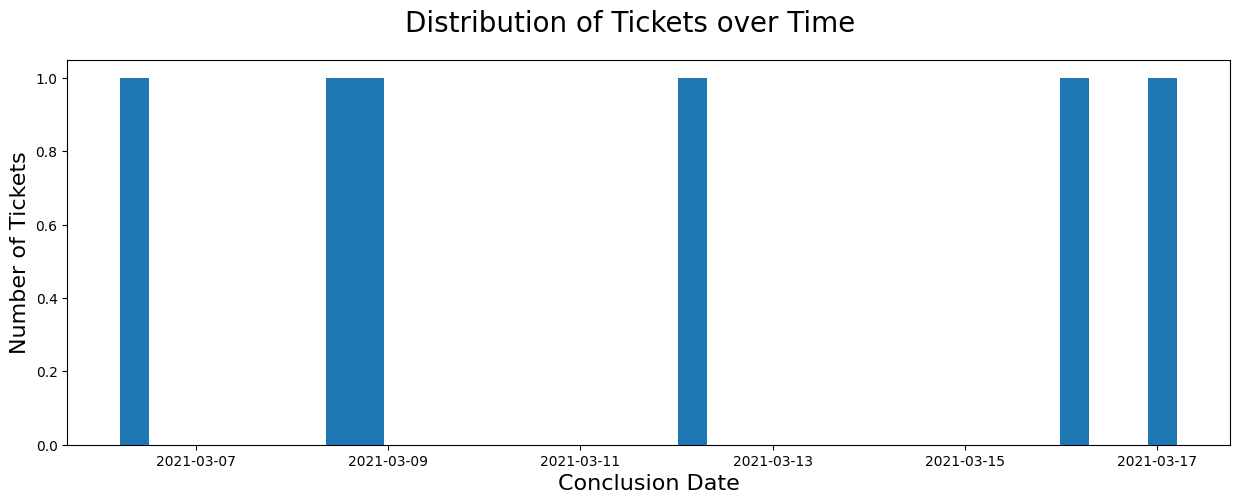

In [41]:
plt.figure(figsize=(15,5))
plt.suptitle('Distribution of Tickets over Time', fontsize=20)
plt.xlabel('Conclusion Date', fontsize=16)
plt.ylabel('Number of Tickets', fontsize=16)
plt.hist(x=chamado_adp_df['dt_conclusao_chamado'], bins=36)
plt.show()

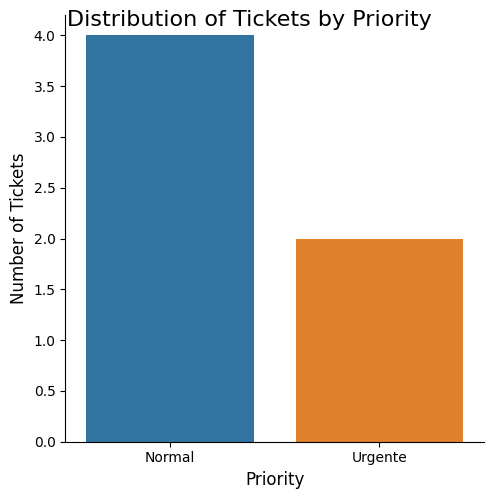

In [42]:
sns.catplot(x='prioridade', data=chamado_adp_df, kind='count')
plt.suptitle('Distribution of Tickets by Priority', fontsize=16)
plt.xlabel('Priority', fontsize=12)
plt.ylabel('Number of Tickets', fontsize=12)
plt.show()

In [43]:
# INDICADOR ADP - GERAL E POR PRIORIDADE / ADP INDICATOR - GENERAL AND BY PRIORITY

adps = {}
adps_descr = []
adps_valor = []

adp_descr = 'Geral'
adp_valor = len(chamado_adp_df.loc[chamado_adp_df['dt_conclusao_chamado'] <= chamado_adp_df['dt_previsao_conclusao_chamado']]) \
    / len(chamado_adp_df)
print('ADP - GERAL / GENERAL :', round(adp_valor * 100, 1), '%   (', round((len(chamado_adp_df) / len(chamado_df)) * 100, 1), '% dos chamados considerados / % of considered tickets)')
adps_descr.append(adp_descr)
adps_valor.append(adp_valor)

for prioridade in prioridade_df.sort_values(by=['nivel'], ascending=False)['prioridade']:
    if len(chamado_adp_df.loc[chamado_adp_df['prioridade'] == prioridade]) != 0:
        adp_descr = prioridade
        chamado_adp_prior_df = chamado_adp_df.loc[chamado_adp_df['prioridade'] == prioridade]
        adp_valor = len(chamado_adp_prior_df.loc[chamado_adp_prior_df['dt_conclusao_chamado'] <= chamado_adp_prior_df['dt_previsao_conclusao_chamado']]) \
            / len(chamado_adp_prior_df)
        print('ADP - CHAMADO / TICKET', prioridade.upper(), ':', round(adp_valor * 100, 1), '%   (', round((len(chamado_adp_prior_df) / len(chamado_df)) * 100, 1), '% dos chamados considerados / % of considered tickets)')
        adps_descr.append(adp_descr)
        adps_valor.append(adp_valor)

adps = {'Filtro': adps_descr, 'ADP': adps_valor}
adps_df = pd.DataFrame.from_dict(adps)

ADP - GERAL / GENERAL : 0.0 %   ( 5.5 % dos chamados considerados / % of considered tickets)
ADP - CHAMADO / TICKET URGENTE : 0.0 %   ( 1.8 % dos chamados considerados / % of considered tickets)
ADP - CHAMADO / TICKET NORMAL : 0.0 %   ( 3.6 % dos chamados considerados / % of considered tickets)


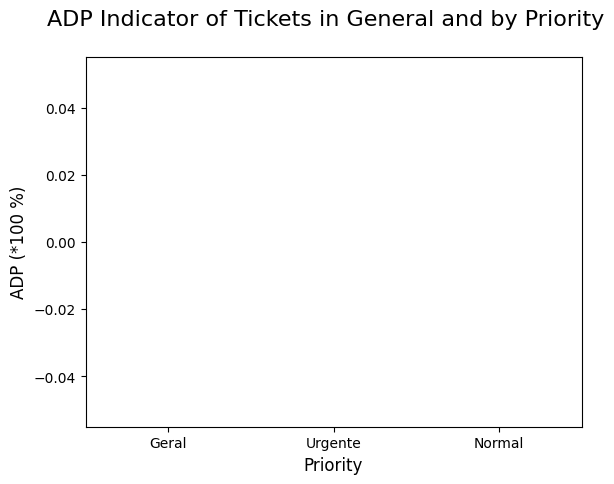

In [44]:
sns.barplot(data=adps_df, x='Filtro', y='ADP')
plt.suptitle('ADP Indicator of Tickets in General and by Priority', fontsize=16)
plt.xlabel('Priority', fontsize=12)
plt.ylabel('ADP (*100 %)', fontsize=12)
plt.show()

In [45]:
chamado_tma_df = chamado_df.merge(prioridade_df, how='left', on='id_prioridade')
chamado_tma_df = chamado_tma_df.merge(chamado_tipo_df, how='left', on='id_chamado_tipo')
chamado_tma_df = chamado_tma_df.merge(sistema_df, how='left', on='id_sistema')
chamado_tma_df = chamado_tma_df.dropna(subset=['dt_abertura'])

In [46]:
chamado_tma_df['tempo_atendimento'] = chamado_tma_df['dt_conclusao_chamado'] - chamado_tma_df['dt_abertura']
chamado_tma_df['tempo_atendimento'] = chamado_tma_df['tempo_atendimento'].apply(lambda x: x.days)

In [47]:
print('QUANTIDADE E PERCENTUAL DE CHAMADOS COM TEMPO DE ATENDIMENTO MAIOR DO QUE 90 DIAS:\n',
      'QUANTITY AND PERCENTAGE OF TICKETS WITH SERVICE TIME GREATER THAN 90 DAYS:\n',
      len(chamado_tma_df.loc[chamado_tma_df['tempo_atendimento'] > 90]), 'CHAMADOS / TICKETS   -   ',
      round((len(chamado_tma_df.loc[chamado_tma_df['tempo_atendimento'] > 90]) / len(chamado_df)) * 100, 1), '% DOS CHAMADOS / % OF TICKETS')

QUANTIDADE E PERCENTUAL DE CHAMADOS COM TEMPO DE ATENDIMENTO MAIOR DO QUE 90 DIAS:
 QUANTITY AND PERCENTAGE OF TICKETS WITH SERVICE TIME GREATER THAN 90 DAYS:
 4 CHAMADOS / TICKETS   -    3.6 % DOS CHAMADOS / % OF TICKETS


In [48]:
print('QUANTIDADE E PERCENTUAL DE CHAMADOS COM TEMPO DE ATENDIMENTO MAIOR DO QUE 180 DIAS:\n',
      'QUANTITY AND PERCENTAGE OF TICKETS WITH SERVICE TIME GREATER THAN 180 DAYS:\n',
      len(chamado_tma_df.loc[chamado_tma_df['tempo_atendimento'] > 180]), 'CHAMADOS / TICKETS   -   ',
      round((len(chamado_tma_df.loc[chamado_tma_df['tempo_atendimento'] > 180]) / len(chamado_df)) * 100, 1), '% DOS CHAMADOS / % OF TICKETS')

QUANTIDADE E PERCENTUAL DE CHAMADOS COM TEMPO DE ATENDIMENTO MAIOR DO QUE 180 DIAS:
 QUANTITY AND PERCENTAGE OF TICKETS WITH SERVICE TIME GREATER THAN 180 DAYS:
 3 CHAMADOS / TICKETS   -    2.7 % DOS CHAMADOS / % OF TICKETS


In [49]:
print('QUANTIDADE E PERCENTUAL DE CHAMADOS COM TEMPO DE ATENDIMENTO MAIOR DO QUE 365 DIAS:\n',
      'QUANTITY AND PERCENTAGE OF TICKETS WITH SERVICE TIME GREATER THAN 365 DAYS:\n',
      len(chamado_tma_df.loc[chamado_tma_df['tempo_atendimento'] > 365]), 'CHAMADOS / TICKETS   -   ',
      round((len(chamado_tma_df.loc[chamado_tma_df['tempo_atendimento'] > 365]) / len(chamado_df)) * 100, 1), '% DOS CHAMADOS / % OF TICKETS')

QUANTIDADE E PERCENTUAL DE CHAMADOS COM TEMPO DE ATENDIMENTO MAIOR DO QUE 365 DIAS:
 QUANTITY AND PERCENTAGE OF TICKETS WITH SERVICE TIME GREATER THAN 365 DAYS:
 2 CHAMADOS / TICKETS   -    1.8 % DOS CHAMADOS / % OF TICKETS


In [50]:
print('MAIOR TEMPO DE ATENDIMENTO:\n',
      'LONGER SERVICE TIME:\n',
      chamado_tma_df['tempo_atendimento'].max(), 'DIAS / DAYS (', round(chamado_tma_df['tempo_atendimento'].max() / 365, 1), 'ANOS / YEARS)')

MAIOR TEMPO DE ATENDIMENTO:
 LONGER SERVICE TIME:
 456 DIAS / DAYS ( 1.2 ANOS / YEARS)


In [51]:
chamado_tma_df

,id_chamado,id_sistema,id_chamado_tipo,id_prioridade,dt_abertura,dt_previsao_conclusao_chamado,dt_conclusao_chamado,prioridade,nivel,tipo,sistema,tempo_atendimento
0,28649,1,5,3.0,2019-12-05 08:17:30.313,NaT,2021-03-06 05:00:03.910,Urgente,2.0,Tipo 5,Sistema 1,456
1,29227,2,5,2.0,2020-02-06 11:52:38.463,NaT,2021-03-11 15:07:05.000,Normal,1.0,Tipo 5,Sistema 2,399
2,30969,27,12,2.0,2020-07-06 18:11:39.693,2020-09-11 18:00:00,2021-03-06 05:00:09.823,Normal,1.0,Tipo 12,Sistema 27,242
3,32951,2,10,2.0,2020-12-03 16:39:37.357,2021-02-12 18:00:00,2021-03-12 05:00:04.467,Normal,1.0,Tipo 10,Sistema 2,98
4,33110,1,5,3.0,2020-12-16 11:54:21.670,NaT,2021-03-06 05:00:02.463,Urgente,2.0,Tipo 5,Sistema 1,79
...,...,...,...,...,...,...,...,...,...,...,...,...
105,34030,1,5,3.0,2021-03-15 19:04:39.270,NaT,2021-03-16 15:20:39.000,Urgente,2.0,Tipo 5,Sistema 1,0
106,34037,2,5,3.0,2021-03-16 10:55:42.037,NaT,2021-03-16 12:32:54.000,Urgente,2.0,Tipo 5,Sistema 2,0
107,34038,2,5,NaN,2021-03-16 11:32:19.410,NaT,2021-03-16 15:15:50.000,NaN,NaN,Tipo 5,Sistema 2,0
108,34039,1,5,NaN,2021-03-16 11:54:00.857,NaT,2021-03-16 15:15:27.000,NaN,NaN,Tipo 5,Sistema 1,0


In [52]:
# INDICADOR TMA - GERAL E POR PRIORIDADE / TMA INDICATOR - GENERAL AND BY PRIORITY 

tmas = {}
tmas_descr = []
tmas_valor = []

tma_descr = 'Geral'
tma_valor = chamado_tma_df['tempo_atendimento'].sum() / len(chamado_tma_df)
print('TMA - GERAL / GENERAL : ', round(tma_valor, 1), 'dias / days   (', round((len(chamado_tma_df) / len(chamado_df)) * 100, 1), '% dos chamados considerados / % of considered tickets)')
tmas_descr.append(tma_descr)
tmas_valor.append(tma_valor)

for prioridade in prioridade_df.sort_values(by=['nivel'], ascending=False)['prioridade']:
    if len(chamado_tma_df.loc[chamado_tma_df['prioridade'] == prioridade]) != 0:
        tma_descr = prioridade
        chamado_tma_prior_df = chamado_tma_df.loc[chamado_tma_df['prioridade'] == prioridade]
        tma_valor = chamado_tma_prior_df['tempo_atendimento'].sum() / len(chamado_tma_prior_df)
        print('TMA - CHAMADO / TICKET', prioridade.upper(), ':', round(tma_valor, 1), 'dias / days   (', round((len(chamado_tma_prior_df) / len(chamado_df)) * 100, 1), '% dos chamados considerados / % of considered tickets)')
        tmas_descr.append(tma_descr)
        tmas_valor.append(tma_valor)

tmas = {'Filtro': tmas_descr, 'TMA': tmas_valor}
tmas_df = pd.DataFrame.from_dict(tmas)

TMA - GERAL / GENERAL :  20.9 dias / days   ( 100.0 % dos chamados considerados / % of considered tickets)
TMA - CHAMADO / TICKET CRÍTICO : 3.4 dias / days   ( 6.4 % dos chamados considerados / % of considered tickets)
TMA - CHAMADO / TICKET URGENTE : 19.6 dias / days   ( 55.5 % dos chamados considerados / % of considered tickets)
TMA - CHAMADO / TICKET NORMAL : 32.3 dias / days   ( 30.0 % dos chamados considerados / % of considered tickets)


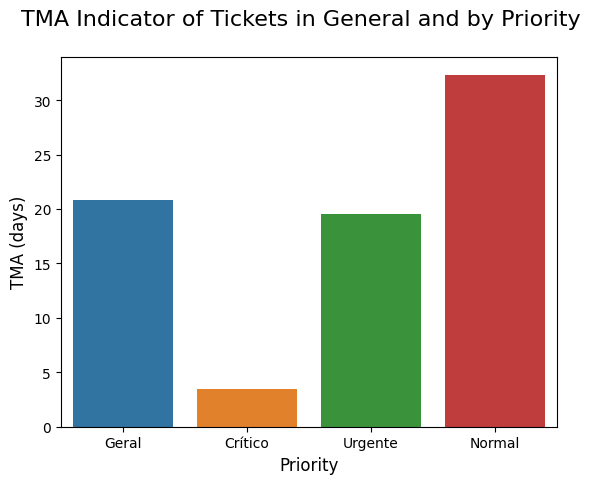

In [53]:
sns.barplot(data=tmas_df, x='Filtro', y='TMA')
plt.suptitle('TMA Indicator of Tickets in General and by Priority', fontsize=16)
plt.xlabel('Priority', fontsize=12)
plt.ylabel('TMA (days)', fontsize=12)
plt.show()

In [54]:
# INDICADOR TMA - GERAL E POR PRIORIDADE - APENAS DOS CHAMADOS COM TEMPO DE ATENDIMENTO MENOR OU IGUAL À 90 DIAS
# TMA INDICATOR - GENERAL AND BY PRIORITY - ONLY TICKETS WITH 90 DAYS OR LESS SERVICE TIME

tmas = {}
tmas_descr = []
tmas_valor = []

tma_descr = 'Geral'
tma_valor = chamado_tma_df.loc[chamado_tma_df['tempo_atendimento'] <= 90, 'tempo_atendimento'].sum() / len(chamado_tma_df.loc[chamado_tma_df['tempo_atendimento'] <= 90])
print('TMA - GERAL / GENERAL : ', round(tma_valor, 1), 'dias / days   (', round((len(chamado_tma_df.loc[chamado_tma_df['tempo_atendimento'] <= 90]) / len(chamado_df)) * 100, 1), '% dos chamados considerados / % of considered tickets)')
tmas_descr.append(tma_descr)
tmas_valor.append(tma_valor)

for prioridade in prioridade_df.sort_values(by=['nivel'], ascending=False)['prioridade']:
    if len(chamado_tma_df.loc[(chamado_tma_df['prioridade'] == prioridade) & (chamado_tma_df['tempo_atendimento'] <= 90)]) != 0:
        tma_descr = prioridade
        chamado_tma_prior_df = chamado_tma_df.loc[(chamado_tma_df['prioridade'] == prioridade) & (chamado_tma_df['tempo_atendimento'] <= 90)]
        tma_valor = chamado_tma_prior_df['tempo_atendimento'].sum() / len(chamado_tma_prior_df)
        print('TMA - CHAMADO / TICKET', prioridade.upper(), ':', round(tma_valor, 1), 'dias / days   (', round((len(chamado_tma_prior_df) / len(chamado_df)) * 100, 1), '% dos chamados considerados / % of considered tickets)')
        tmas_descr.append(tma_descr)
        tmas_valor.append(tma_valor)

tmas = {'Filtro': tmas_descr, 'TMA': tmas_valor}
tmas_df = pd.DataFrame.from_dict(tmas)

TMA - GERAL / GENERAL :  10.4 dias / days   ( 96.4 % dos chamados considerados / % of considered tickets)
TMA - CHAMADO / TICKET CRÍTICO : 3.4 dias / days   ( 6.4 % dos chamados considerados / % of considered tickets)
TMA - CHAMADO / TICKET URGENTE : 12.3 dias / days   ( 54.5 % dos chamados considerados / % of considered tickets)
TMA - CHAMADO / TICKET NORMAL : 10.9 dias / days   ( 27.3 % dos chamados considerados / % of considered tickets)


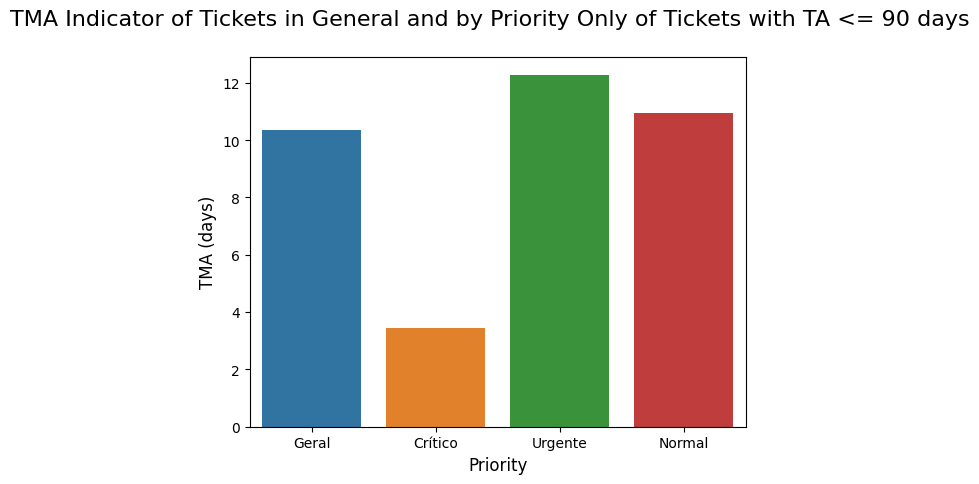

In [55]:
sns.barplot(data=tmas_df, x='Filtro', y='TMA')
plt.suptitle('TMA Indicator of Tickets in General and by Priority Only of Tickets with TA <= 90 days', fontsize=16)
plt.xlabel('Priority', fontsize=12)
plt.ylabel('TMA (days)', fontsize=12)
plt.show()

In [56]:
# INDICADOR TMA POR TIPO DE CHAMADO / TMA INDICATOR BY TICKET TYPE

tmas = {}
tmas_descr = []
tmas_valor = []

for tipo in chamado_tipo_df.sort_values(by=['id_chamado_tipo'], ascending=True)['tipo']:
    if len(chamado_tma_df.loc[chamado_tma_df['tipo'] == tipo]) != 0:
        tma_descr = tipo
        chamado_tma_tipo_df = chamado_tma_df.loc[chamado_tma_df['tipo'] == tipo]
        tma_valor = chamado_tma_tipo_df['tempo_atendimento'].sum() / len(chamado_tma_tipo_df)
        print('TMA - CHAMADO / TICKET', tipo.upper(), ':', round(tma_valor, 1), 'dias / days   (', round((len(chamado_tma_tipo_df) / len(chamado_df)) * 100, 1), '% dos chamados considerados / % of considered tickets)')
        tmas_descr.append(tma_descr)
        tmas_valor.append(tma_valor)

tmas = {'Filtro': tmas_descr, 'TMA': tmas_valor}
tmas_df = pd.DataFrame.from_dict(tmas)

TMA - CHAMADO / TICKET TIPO 5 : 23.4 dias / days   ( 62.7 % dos chamados considerados / % of considered tickets)
TMA - CHAMADO / TICKET TIPO 6 : 5.2 dias / days   ( 10.9 % dos chamados considerados / % of considered tickets)
TMA - CHAMADO / TICKET TIPO 10 : 56.3 dias / days   ( 2.7 % dos chamados considerados / % of considered tickets)
TMA - CHAMADO / TICKET TIPO 12 : 17.4 dias / days   ( 22.7 % dos chamados considerados / % of considered tickets)
TMA - CHAMADO / TICKET TIPO 1001 : 11.0 dias / days   ( 0.9 % dos chamados considerados / % of considered tickets)


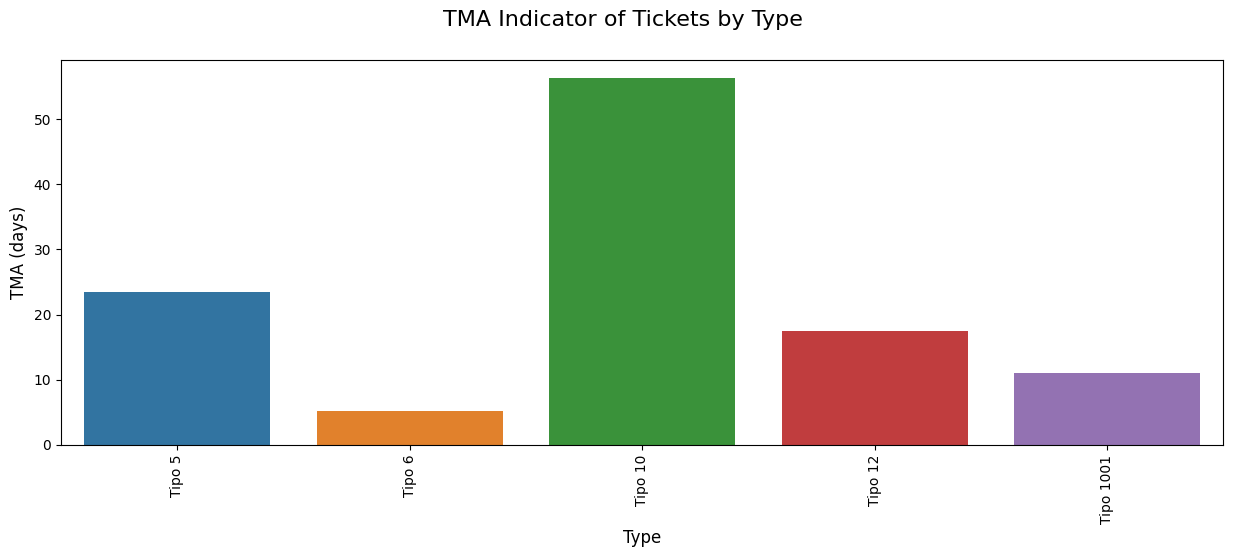

In [57]:
plt.figure(figsize=(15,5))
sns.barplot(data=tmas_df, x='Filtro', y='TMA')
plt.suptitle('TMA Indicator of Tickets by Type', fontsize=16)
plt.xlabel('Type', fontsize=12)
plt.ylabel('TMA (days)', fontsize=12)
plt.xticks(rotation=90)
plt.show()

In [58]:
# INDICADOR TMA POR TIPO DE CHAMADO APENAS DOS CHAMADOS COM TEMPO DE ATENDIMENTO MENOR OU IGUAL À 90 DIAS
# TMA INDICATOR BY TYPE OF TICKET ONLY TICKETS WITH AN ANSWER TIME LESS OR EQUAL TO 90 DAYS

tmas = {}
tmas_descr = []
tmas_valor = []

for tipo in chamado_tipo_df.sort_values(by=['id_chamado_tipo'], ascending=True)['tipo']:
    if len(chamado_tma_df.loc[(chamado_tma_df['tipo'] == tipo) & (chamado_tma_df['tempo_atendimento'] <= 90)]) != 0:
        tma_descr = tipo
        chamado_tma_tipo_df = chamado_tma_df.loc[(chamado_tma_df['tipo'] == tipo) & (chamado_tma_df['tempo_atendimento'] <= 90)]
        tma_valor = chamado_tma_tipo_df['tempo_atendimento'].sum() / len(chamado_tma_tipo_df)
        print('TMA - CHAMADO / TICKET', tipo.upper(), ':', round(tma_valor, 1), 'dias / days   (', round((len(chamado_tma_tipo_df) / len(chamado_df)) * 100, 1), '% dos chamados considerados / % of considered tickets)')
        tmas_descr.append(tma_descr)
        tmas_valor.append(tma_valor)

tmas = {'Filtro': tmas_descr, 'TMA': tmas_valor}
tmas_df = pd.DataFrame.from_dict(tmas)

TMA - CHAMADO / TICKET TIPO 5 : 11.4 dias / days   ( 60.9 % dos chamados considerados / % of considered tickets)
TMA - CHAMADO / TICKET TIPO 6 : 5.2 dias / days   ( 10.9 % dos chamados considerados / % of considered tickets)
TMA - CHAMADO / TICKET TIPO 10 : 35.5 dias / days   ( 1.8 % dos chamados considerados / % of considered tickets)
TMA - CHAMADO / TICKET TIPO 12 : 8.0 dias / days   ( 21.8 % dos chamados considerados / % of considered tickets)
TMA - CHAMADO / TICKET TIPO 1001 : 11.0 dias / days   ( 0.9 % dos chamados considerados / % of considered tickets)


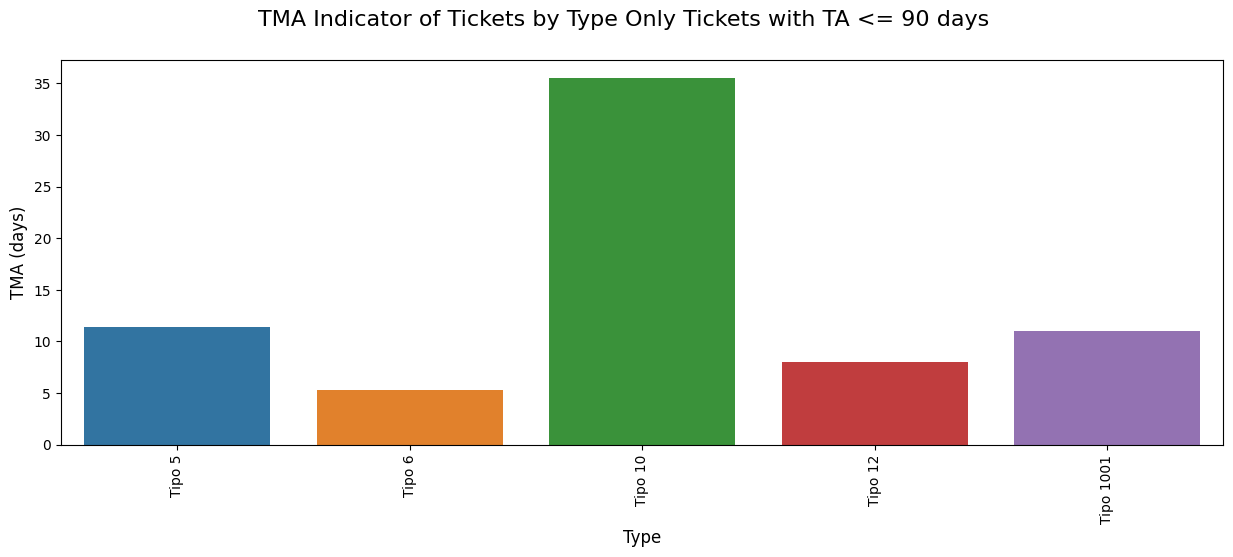

In [59]:
plt.figure(figsize=(15,5))
sns.barplot(data=tmas_df, x='Filtro', y='TMA')
plt.suptitle('TMA Indicator of Tickets by Type Only Tickets with TA <= 90 days', fontsize=16)
plt.xlabel('Type', fontsize=12)
plt.ylabel('TMA (days)', fontsize=12)
plt.xticks(rotation=90)
plt.show()

In [60]:
# INDICADOR TMA POR SISTEMA / TMA INDICATOR BY SYSTEM

tmas = {}
tmas_descr = []
tmas_valor = []

for sistema in sistema_df.sort_values(by=['id_sistema'], ascending=True)['sistema']:
    if len(chamado_tma_df.loc[chamado_tma_df['sistema'] == sistema]) != 0:
        tma_descr = sistema
        chamado_tma_sistema_df = chamado_tma_df.loc[chamado_tma_df['sistema'] == sistema]
        tma_valor = chamado_tma_sistema_df['tempo_atendimento'].sum() / len(chamado_tma_sistema_df)
        print('TMA - CHAMADO / TICKET', sistema.upper(), ':', round(tma_valor, 1), 'dias / days   (', round((len(chamado_tma_sistema_df) / len(chamado_df)) * 100, 1), '% dos chamados considerados / % of considered tickets)')
        tmas_descr.append(tma_descr)
        tmas_valor.append(tma_valor)

tmas = {'Filtro': tmas_descr, 'TMA': tmas_valor}
tmas_df = pd.DataFrame.from_dict(tmas)

TMA - CHAMADO / TICKET SISTEMA 1 : 49.4 dias / days   ( 10.0 % dos chamados considerados / % of considered tickets)
TMA - CHAMADO / TICKET SISTEMA 2 : 17.4 dias / days   ( 58.2 % dos chamados considerados / % of considered tickets)
TMA - CHAMADO / TICKET SISTEMA 4 : 0.0 dias / days   ( 0.9 % dos chamados considerados / % of considered tickets)
TMA - CHAMADO / TICKET SISTEMA 6 : 1.8 dias / days   ( 3.6 % dos chamados considerados / % of considered tickets)
TMA - CHAMADO / TICKET SISTEMA 8 : 8.0 dias / days   ( 13.6 % dos chamados considerados / % of considered tickets)
TMA - CHAMADO / TICKET SISTEMA 11 : 61.0 dias / days   ( 0.9 % dos chamados considerados / % of considered tickets)
TMA - CHAMADO / TICKET SISTEMA 14 : 33.0 dias / days   ( 1.8 % dos chamados considerados / % of considered tickets)
TMA - CHAMADO / TICKET SISTEMA 15 : 11.0 dias / days   ( 0.9 % dos chamados considerados / % of considered tickets)
TMA - CHAMADO / TICKET SISTEMA 20 : 14.0 dias / days   ( 0.9 % dos chamados c

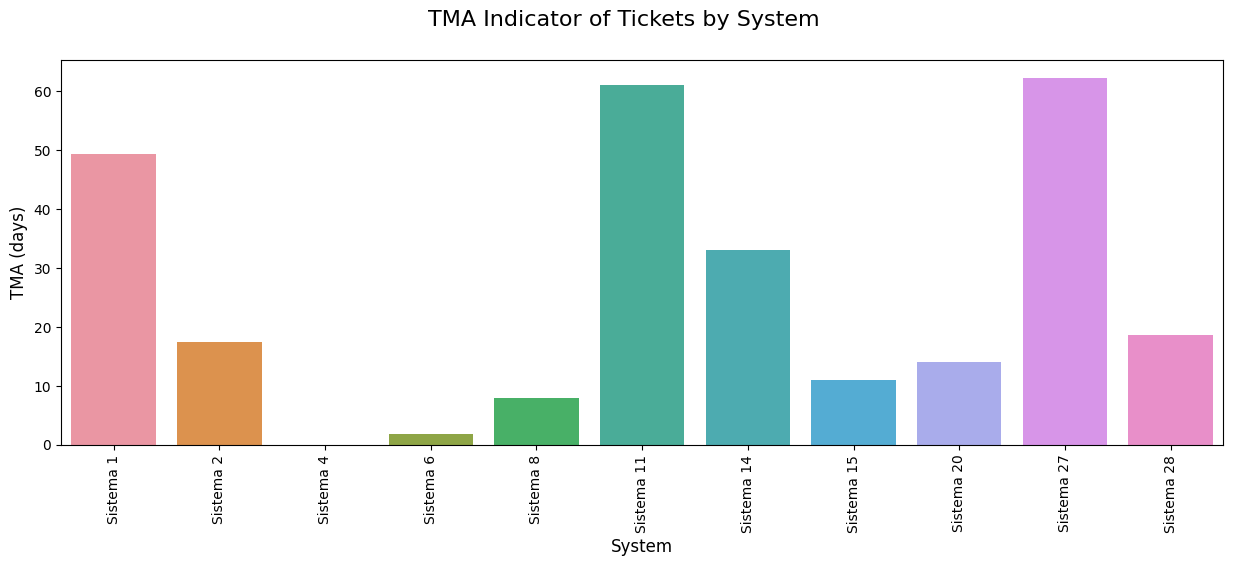

In [61]:
plt.figure(figsize=(15,5))
sns.barplot(data=tmas_df, x='Filtro', y='TMA')
plt.suptitle('TMA Indicator of Tickets by System', fontsize=16)
plt.xlabel('System', fontsize=12)
plt.ylabel('TMA (days)', fontsize=12)
plt.xticks(rotation=90)
plt.show()

In [62]:
# INDICADOR TMA POR SISTEMA APENAS DOS CHAMADOS COM TEMPO DE ATENDIMENTO MENOR OU IGUAL À 90 DIAS
# TMA INDICATOR BY SYSTEM ONLY FOR TICKETS WITH ANSWERING TIME LESS OR EQUAL TO 90 DAYS

tmas = {}
tmas_descr = []
tmas_valor = []

for sistema in sistema_df.sort_values(by=['id_sistema'], ascending=True)['sistema']:
    if len(chamado_tma_df.loc[(chamado_tma_df['sistema'] == sistema) & (chamado_tma_df['tempo_atendimento'] <= 90)]) != 0:
        tma_descr = sistema
        chamado_tma_sistema_df = chamado_tma_df.loc[(chamado_tma_df['sistema'] == sistema) & (chamado_tma_df['tempo_atendimento'] <= 90)]
        tma_valor = chamado_tma_sistema_df['tempo_atendimento'].sum() / len(chamado_tma_sistema_df)
        print('TMA - CHAMADO / TICKET', sistema.upper(), ':', round(tma_valor, 1), 'dias / days   (', round((len(chamado_tma_sistema_df) / len(chamado_df)) * 100, 1), '% dos chamados considerados / % of considered tickets)')
        tmas_descr.append(tma_descr)
        tmas_valor.append(tma_valor)

tmas = {'Filtro': tmas_descr, 'TMA': tmas_valor}
tmas_df = pd.DataFrame.from_dict(tmas)

TMA - CHAMADO / TICKET SISTEMA 1 : 8.7 dias / days   ( 9.1 % dos chamados considerados / % of considered tickets)
TMA - CHAMADO / TICKET SISTEMA 2 : 9.9 dias / days   ( 56.4 % dos chamados considerados / % of considered tickets)
TMA - CHAMADO / TICKET SISTEMA 4 : 0.0 dias / days   ( 0.9 % dos chamados considerados / % of considered tickets)
TMA - CHAMADO / TICKET SISTEMA 6 : 1.8 dias / days   ( 3.6 % dos chamados considerados / % of considered tickets)
TMA - CHAMADO / TICKET SISTEMA 8 : 8.0 dias / days   ( 13.6 % dos chamados considerados / % of considered tickets)
TMA - CHAMADO / TICKET SISTEMA 11 : 61.0 dias / days   ( 0.9 % dos chamados considerados / % of considered tickets)
TMA - CHAMADO / TICKET SISTEMA 14 : 33.0 dias / days   ( 1.8 % dos chamados considerados / % of considered tickets)
TMA - CHAMADO / TICKET SISTEMA 15 : 11.0 dias / days   ( 0.9 % dos chamados considerados / % of considered tickets)
TMA - CHAMADO / TICKET SISTEMA 20 : 14.0 dias / days   ( 0.9 % dos chamados cons

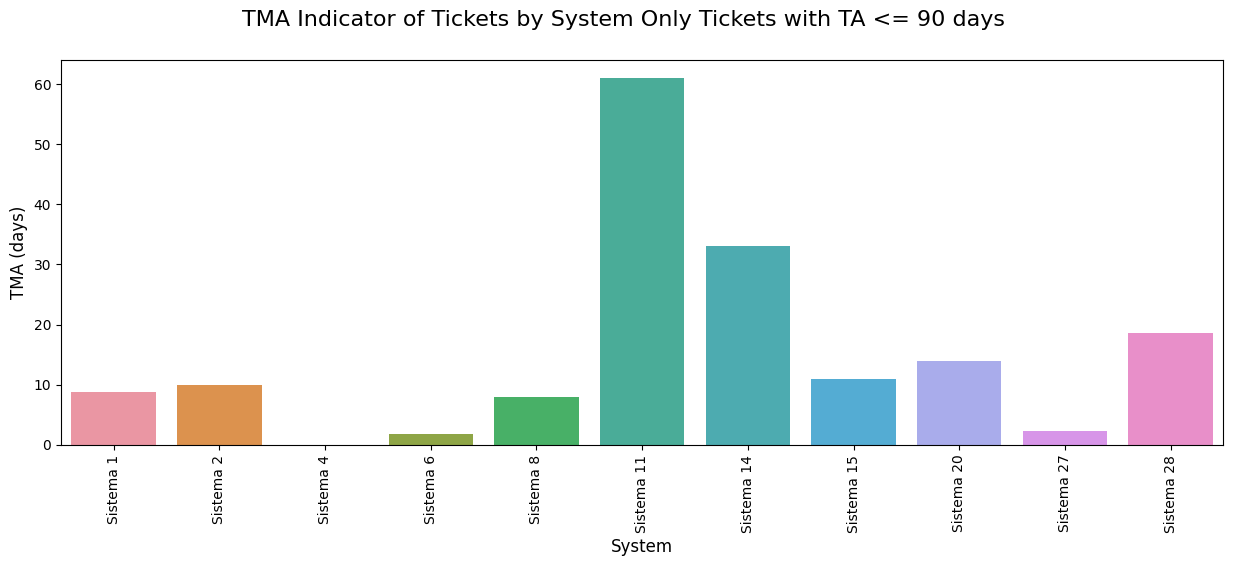

In [63]:
plt.figure(figsize=(15,5))
sns.barplot(data=tmas_df, x='Filtro', y='TMA')
plt.suptitle('TMA Indicator of Tickets by System Only Tickets with TA <= 90 days', fontsize=16)
plt.xlabel('System', fontsize=12)
plt.ylabel('TMA (days)', fontsize=12)
plt.xticks(rotation=90)
plt.show()

## Análise das Interações dos Chamados / *Analysis of Ticket Interactions*

- Cálculo do ADP das interações geral e por prioridade


- *ADP calculation of interactions overall and by priority*

In [64]:
chamado_interacao_adp_df = chamado_interacao_df.merge(prioridade_df, how='left', on='id_prioridade')
chamado_interacao_adp_df = chamado_interacao_adp_df.dropna(subset=['dt_previsao_conclusao', 'dt_conclusao'])

In [65]:
chamado_interacao_adp_df

,id_chamado_interacao,id_chamado,dt_previsao_conclusao,dt_conclusao,id_prioridade,prioridade,nivel
1,494002,28649,2019-12-05 08:17:19,2019-12-05 08:17:19,3.0,Urgente,2.0
2,494003,28649,2019-12-05 08:17:26,2019-12-05 08:17:26,3.0,Urgente,2.0
3,494004,28649,2019-12-05 08:17:52,2019-12-05 08:17:52,3.0,Urgente,2.0
4,494005,28649,2019-12-05 08:18:04,2019-12-05 08:18:04,3.0,Urgente,2.0
5,494037,28649,2019-12-05 09:16:52,2019-12-05 09:16:52,3.0,Urgente,2.0
...,...,...,...,...,...,...,...
2594,607248,34040,2021-03-16 14:22:40,2021-03-16 14:22:40,NaN,NaN,NaN
2595,607299,34040,2021-03-16 16:08:07,2021-03-16 16:08:07,NaN,NaN,NaN
2596,607342,34040,2021-03-16 17:31:35,2021-03-16 17:31:35,NaN,NaN,NaN
2598,607345,34040,2021-03-16 17:33:10,2021-03-16 17:33:10,NaN,NaN,NaN


In [66]:
# INDICADOR ADP - GERAL E POR PRIORIDADE / ADP INDICATOR - GENERAL AND BY PRIORITY

adps = {}
adps_descr = []
adps_valor = []

adp_descr = 'Geral'
adp_valor = len(chamado_interacao_adp_df.loc[chamado_interacao_adp_df['dt_conclusao'] <= chamado_interacao_adp_df['dt_previsao_conclusao']]) \
    / len(chamado_interacao_adp_df)
print('ADP - GERAL / GENERAL :', round(adp_valor * 100, 1), '%   (', round((len(chamado_interacao_adp_df) / len(chamado_interacao_df)) * 100, 1), '% dos chamados considerados / % of considered tickets)')
adps_descr.append(adp_descr)
adps_valor.append(adp_valor)

for prioridade in prioridade_df.sort_values(by=['nivel'], ascending=False)['prioridade']:
    if len(chamado_interacao_adp_df.loc[chamado_interacao_adp_df['prioridade'] == prioridade]) != 0:
        adp_descr = prioridade
        chamado_interacao_adp_prior_df = chamado_interacao_adp_df.loc[chamado_interacao_adp_df['prioridade'] == prioridade]
        adp_valor = len(chamado_interacao_adp_prior_df.loc[chamado_interacao_adp_prior_df['dt_conclusao'] <= chamado_interacao_adp_prior_df['dt_previsao_conclusao']]) \
            / len(chamado_interacao_adp_prior_df)
        print('ADP - CHAMADO / TICKET', prioridade.upper(), ':', round(adp_valor * 100, 1), '%   (', round((len(chamado_interacao_adp_prior_df) / len(chamado_interacao_df)) * 100, 1), '% dos chamados considerados / % of considered tickets)')
        adps_descr.append(adp_descr)
        adps_valor.append(adp_valor)

adps = {'Filtro': adps_descr, 'ADP': adps_valor}
adps_df = pd.DataFrame.from_dict(adps)

ADP - GERAL / GENERAL : 100.0 %   ( 54.8 % dos chamados considerados / % of considered tickets)
ADP - CHAMADO / TICKET CRÍTICO : 100.0 %   ( 1.6 % dos chamados considerados / % of considered tickets)
ADP - CHAMADO / TICKET URGENTE : 100.0 %   ( 24.0 % dos chamados considerados / % of considered tickets)
ADP - CHAMADO / TICKET NORMAL : 100.0 %   ( 25.6 % dos chamados considerados / % of considered tickets)


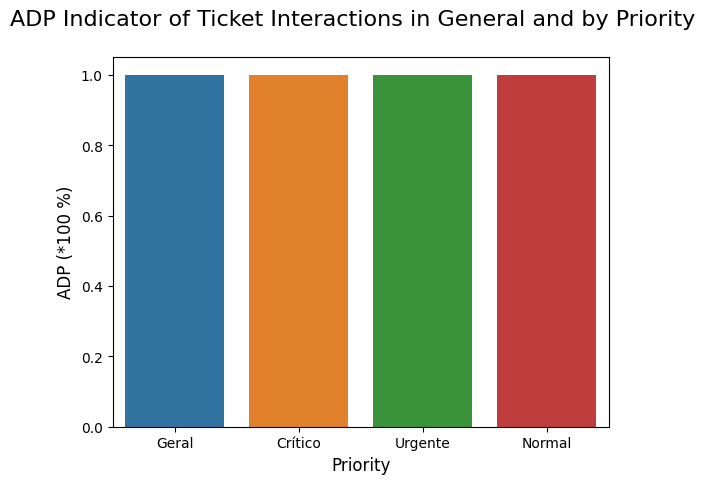

In [67]:
sns.barplot(data=adps_df, x='Filtro', y='ADP')
plt.suptitle('ADP Indicator of Ticket Interactions in General and by Priority', fontsize=16)
plt.xlabel('Priority', fontsize=12)
plt.ylabel('ADP (*100 %)', fontsize=12)
plt.show()

## Análise das Tarefas dos Chamados / *Analysis of the Ticket Tasks*

- Cálculo do ADP das tarefas geral e por prioridade


- *ADP calculation of general tasks and by priority*

In [68]:
tarefa_adp_df = tarefa_df.merge(prioridade_df, how='left', on='id_prioridade')
tarefa_adp_df = tarefa_adp_df.dropna(subset=['dt_prev_inicio', 'dt_prev_fim', 'dt_inicio', 'dt_fim'])

In [69]:
tarefa_adp_df['previsao'] = tarefa_adp_df['dt_prev_fim'] - tarefa_adp_df['dt_prev_inicio']
tarefa_adp_df['real'] = tarefa_adp_df['dt_fim'] - tarefa_adp_df['dt_inicio']

In [70]:
tarefa_adp_df

,id_tarefa,id_chamado,dt_prev_inicio,dt_prev_fim,dt_inicio,dt_fim,retrabalho,id_prioridade,prioridade,nivel,previsao,real
0,14913,29227,2020-05-19 09:00:00,2020-05-20 18:00:00,2020-05-19 08:52:47,2020-05-19 09:23:47,False,2.0,Normal,1.0,1 days 09:00:00,0 days 00:31:00
1,16980,30969,2020-07-17 11:50:00,2020-07-17 14:00:00,2020-07-17 11:45:00,2020-07-17 12:22:29,False,2.0,Normal,1.0,0 days 02:10:00,0 days 00:37:29
2,17059,30969,2020-07-20 17:00:00,2020-07-20 18:00:00,2020-07-20 16:53:21,2020-07-20 18:39:12,False,2.0,Normal,1.0,0 days 01:00:00,0 days 01:45:51
3,17251,30969,2020-07-24 09:15:00,2020-07-24 18:00:00,2020-07-24 09:17:25,2020-07-24 10:00:56,False,2.0,Normal,1.0,0 days 08:45:00,0 days 00:43:31
4,17480,30969,2020-07-30 15:50:00,2020-07-30 17:30:00,2020-07-30 15:51:58,2020-07-30 17:31:43,False,2.0,Normal,1.0,0 days 01:40:00,0 days 01:39:45
...,...,...,...,...,...,...,...,...,...,...,...,...
90,26489,33953,2021-03-09 10:23:00,2021-03-09 11:30:00,2021-03-09 10:23:00,2021-03-09 11:27:00,False,3.0,Urgente,2.0,0 days 01:07:00,0 days 01:04:00
91,26637,33936,2021-03-11 12:11:00,2021-03-11 13:30:00,2021-03-11 12:10:00,2021-03-12 08:09:00,False,NaN,NaN,NaN,0 days 01:19:00,0 days 19:59:00
92,26642,33978,2021-03-11 13:45:00,2021-03-11 14:20:00,2021-03-11 13:45:00,2021-03-11 14:16:00,False,3.0,Urgente,2.0,0 days 00:35:00,0 days 00:31:00
93,26720,33980,2021-03-12 14:47:00,2021-03-12 16:00:00,2021-03-12 14:47:00,2021-03-12 16:00:00,False,3.0,Urgente,2.0,0 days 01:13:00,0 days 01:13:00


In [71]:
# INDICADOR ADP - GERAL E POR PRIORIDADE / ADP INDICATOR - GENERAL AND BY PRIORITY

adps = {}
adps_descr = []
adps_valor = []

adp_descr = 'Geral'
adp_valor = len(tarefa_adp_df.loc[tarefa_adp_df['real'] <= tarefa_adp_df['previsao']]) \
    / len(tarefa_adp_df)
print('ADP - GERAL / GENERAL :', round(adp_valor * 100, 1), '%   (', round((len(tarefa_adp_df) / len(tarefa_df)) * 100, 1), '% dos chamados considerados / % of considered tickets)')
adps_descr.append(adp_descr)
adps_valor.append(adp_valor)

for prioridade in prioridade_df.sort_values(by=['nivel'], ascending=False)['prioridade']:
    if len(tarefa_adp_df.loc[tarefa_adp_df['prioridade'] == prioridade]) != 0:
        adp_descr = prioridade
        tarefa_adp_prior_df = tarefa_adp_df.loc[tarefa_adp_df['prioridade'] == prioridade]
        adp_valor = len(tarefa_adp_prior_df.loc[tarefa_adp_prior_df['real'] <= tarefa_adp_prior_df['previsao']]) \
        / len(tarefa_adp_prior_df)
        print('ADP - CHAMADO / TICKET', prioridade.upper(), ':', round(adp_valor * 100, 1), '%   (', round((len(tarefa_adp_prior_df) / len(tarefa_df)) * 100, 1), '% dos chamados considerados / % of considered tickets)')
        adps_descr.append(adp_descr)
        adps_valor.append(adp_valor)

adps = {'Filtro': adps_descr, 'ADP': adps_valor}
adps_df = pd.DataFrame.from_dict(adps)

ADP - GERAL / GENERAL : 67.0 %   ( 98.9 % dos chamados considerados / % of considered tickets)
ADP - CHAMADO / TICKET CRÍTICO : 100.0 %   ( 1.1 % dos chamados considerados / % of considered tickets)
ADP - CHAMADO / TICKET URGENTE : 83.3 %   ( 25.3 % dos chamados considerados / % of considered tickets)
ADP - CHAMADO / TICKET NORMAL : 61.8 %   ( 71.6 % dos chamados considerados / % of considered tickets)


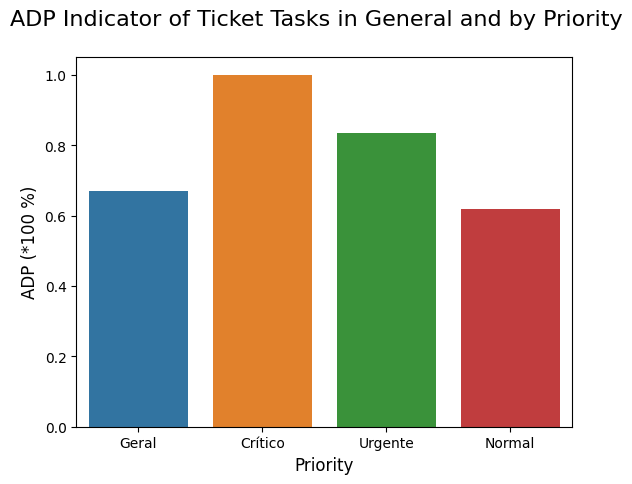

In [72]:
sns.barplot(data=adps_df, x='Filtro', y='ADP')
plt.suptitle('ADP Indicator of Ticket Tasks in General and by Priority', fontsize=16)
plt.xlabel('Priority', fontsize=12)
plt.ylabel('ADP (*100 %)', fontsize=12)
plt.show()

## Análise Chamados X Tarefas / *Analysis Tickets X Tasks*

In [73]:
chamado_tarefa_df = chamado_df.merge(tarefa_df, on='id_chamado')
chamado_tarefa_df = chamado_tarefa_df.dropna(subset=['dt_previsao_conclusao_chamado', 'dt_conclusao_chamado', 
                                                     'dt_prev_inicio', 'dt_prev_fim', 'dt_inicio', 'dt_fim'])

In [74]:
chamado_tarefa_df['adp_chamado'] = chamado_tarefa_df['dt_conclusao_chamado'] <= chamado_tarefa_df['dt_previsao_conclusao_chamado']

In [75]:
chamado_tarefa_df['previsao_tarefa'] = chamado_tarefa_df['dt_prev_fim'] - chamado_tarefa_df['dt_prev_inicio']
chamado_tarefa_df['real_tarefa'] = chamado_tarefa_df['dt_fim'] - chamado_tarefa_df['dt_inicio']
chamado_tarefa_df['adp_tarefa'] = chamado_tarefa_df['real_tarefa'] <= chamado_tarefa_df['previsao_tarefa']

In [76]:
chamado_tarefa_df

,id_chamado,id_sistema,id_chamado_tipo,id_prioridade_x,dt_abertura,dt_previsao_conclusao_chamado,dt_conclusao_chamado,id_tarefa,dt_prev_inicio,dt_prev_fim,dt_inicio,dt_fim,retrabalho,id_prioridade_y,adp_chamado,previsao_tarefa,real_tarefa,adp_tarefa
1,30969,27,12,2.0,2020-07-06 18:11:39.693,2020-09-11 18:00:00,2021-03-06 05:00:09.823,16980,2020-07-17 11:50:00,2020-07-17 14:00:00,2020-07-17 11:45:00,2020-07-17 12:22:29,False,2.0,False,0 days 02:10:00,0 days 00:37:29,True
2,30969,27,12,2.0,2020-07-06 18:11:39.693,2020-09-11 18:00:00,2021-03-06 05:00:09.823,17059,2020-07-20 17:00:00,2020-07-20 18:00:00,2020-07-20 16:53:21,2020-07-20 18:39:12,False,2.0,False,0 days 01:00:00,0 days 01:45:51,False
3,30969,27,12,2.0,2020-07-06 18:11:39.693,2020-09-11 18:00:00,2021-03-06 05:00:09.823,17251,2020-07-24 09:15:00,2020-07-24 18:00:00,2020-07-24 09:17:25,2020-07-24 10:00:56,False,2.0,False,0 days 08:45:00,0 days 00:43:31,True
4,30969,27,12,2.0,2020-07-06 18:11:39.693,2020-09-11 18:00:00,2021-03-06 05:00:09.823,17480,2020-07-30 15:50:00,2020-07-30 17:30:00,2020-07-30 15:51:58,2020-07-30 17:31:43,False,2.0,False,0 days 01:40:00,0 days 01:39:45,True
5,30969,27,12,2.0,2020-07-06 18:11:39.693,2020-09-11 18:00:00,2021-03-06 05:00:09.823,18459,2020-09-01 14:30:00,2020-09-01 18:30:00,2020-09-01 14:37:10,2020-09-01 18:12:31,False,2.0,False,0 days 04:00:00,0 days 03:35:21,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62,33358,14,10,2.0,2021-01-11 12:53:26.440,2021-03-03 18:00:00,2021-03-17 05:00:08.867,26513,2021-03-09 14:16:00,2021-03-09 18:30:00,2021-03-09 14:15:00,2021-03-09 16:04:00,False,2.0,False,0 days 04:14:00,0 days 01:49:00,True
65,33794,20,5,3.0,2021-02-22 11:04:41.690,2021-02-25 18:30:00,2021-03-08 16:26:10.000,25825,2021-02-24 10:55:00,2021-02-24 13:00:00,2021-02-24 10:54:00,2021-02-24 12:53:00,False,3.0,False,0 days 02:05:00,0 days 01:59:00,True
66,33794,20,5,3.0,2021-02-22 11:04:41.690,2021-02-25 18:30:00,2021-03-08 16:26:10.000,25840,2021-02-24 14:00:00,2021-02-24 18:00:00,2021-02-24 14:04:00,2021-02-24 18:43:00,False,3.0,False,0 days 04:00:00,0 days 04:39:00,False
67,33794,20,5,3.0,2021-02-22 11:04:41.690,2021-02-25 18:30:00,2021-03-08 16:26:10.000,25888,2021-02-25 09:00:00,2021-02-25 13:00:00,2021-02-25 09:00:00,2021-02-25 12:44:00,False,3.0,False,0 days 04:00:00,0 days 03:44:00,True


In [77]:
chamado_tarefa_df = chamado_tarefa_df[['id_chamado', 'adp_chamado', 'adp_tarefa']]
chamado_tarefa_df['adp_chamado'] = chamado_tarefa_df['adp_chamado'].apply(lambda x: 1 if x==True else 0)
chamado_tarefa_df['adp_tarefa'] = chamado_tarefa_df['adp_tarefa'].apply(lambda x: 1 if x==True else 0)
chamado_tarefa_df = chamado_tarefa_df.groupby(['id_chamado']).agg({'adp_chamado' : 'mean', 'adp_tarefa' : 'mean'}).reset_index()

In [78]:
chamado_tarefa_df

,id_chamado,adp_chamado,adp_tarefa
0,30969,0.0,0.600000
1,32951,0.0,0.625000
2,33141,0.0,0.750000
3,33308,0.0,0.666667
4,33358,0.0,0.571429
5,33794,0.0,0.750000


In [79]:
chamado_tarefa_df[['adp_chamado', 'adp_tarefa']].corr()

,adp_chamado,adp_tarefa
adp_chamado,NaN,NaN
adp_tarefa,NaN,1.0


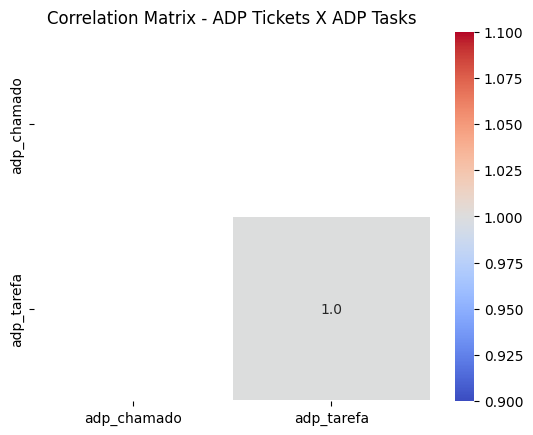

In [80]:
sns.heatmap(chamado_tarefa_df[['adp_chamado', 'adp_tarefa']].corr(), cmap='coolwarm', annot=True, fmt='.1f', linewidths=.1)
plt.title('Correlation Matrix - ADP Tickets X ADP Tasks')
plt.show()

## Conclusões / *Conclusions*

### Conclusões - Análise Geral dos Dados / *Conclusions - General Data Analysis*
- Existe uma quantidade significativa de chamados com o coluna dt_previsao_conclusao_chamado vazio, o que impossibilita o cálculo do indicador ADP nestes chamados e evidencia que provavelmente não houve uma formalização de prazo para conclusão do chamado para apresentação ao cliente ou planejamento e controle interno.
- Existe uma quantidade significativa de interações com o coluna dt_conclusao vazio, o que impossibilita o cálculo do indicador ADP nestas interações e evidencia uma possível conclusão inadequada das mesmas.
- O coluna retrabalho das tarefas não contém NENHUM retrabalho apontado, o que impossibilita a verificação de uma possível correlação entre a ocorrência de retrabalhos e o atraso na conclusão das tarefas.


- *There is a significant number of tickets with the empty column dt_previsao_conclusao_chamado, which makes it impossible to calculate the ADP indicator in these tickets and shows that there was probably no formalization of a deadline for completing the ticket for presentation to the customer or planning and internal control.*
- *There is a significant amount of interactions with the empty column dt_conclusao, which makes it impossible to calculate the ADP indicator in these interactions and shows a possible inadequate conclusion of them.*
- *The rework column of the tasks does not contain ANY rework pointed out, which makes it impossible to verify a possible correlation between the occurrence of rework and the delay in completing the tasks.*

### Conclusões - Análise dos Chamados / *Conclusions - Analysis of Tickets*
- A quantidade de chamados concluídos varia bastante de um mês para outro, porém não existe tendência de aumento ou redução desta quantidade.
- A quantidade de chamados urgentes em relação aos normais é menor, e a quantidade de chamados críticos em relação aos normais é muito menor.
- O indicador ADP dos chamados está muito baixo, principalmente dos chamados críticos e urgentes.
- Existe uma quantidade significativa de chamados com tempo de atendimento maior do que 90 dias, isto pode estar sendo causado por uma falha no processo de formalização da conclusão destes chamados ou por tempos de atendimento excessivos.
- O indicador TMA dos chamados críticos e urgentes está muito alto, mesmo considerando apenas os chamados com tempo de atendimento menor ou igual à 90 dias.
- O indicador TMA dos chamados do tipo 4 está muito mais alto que o TMA dos outros tipos. Considerando apenas os chamados com tempo de atendimento menor ou igual à 90 dias, o TMA dos chamados dos tipos 2, 3, 8 e 10 são os maiores.
- O indicador TMA dos chamados do sistema 19 está muito mais alto que o TMA dos outros sistemas. Considerando apenas os chamados com tempo de atendimento menor ou igual à 90 dias, o TMA dos chamados dos sistemas 5, 11 e 22 são os maiores.


- *The number of completed tickets varies a lot from one month to another, but there is no tendency to increase or decrease this amount.*
- *The amount of urgent tickets compared to normal ones is lower, and the amount of critical tickets compared to normal ones is much lower.*
- *The ADP indicator for tickets is very low, especially for critical and urgent tickets.*
- *There is a significant number of tickets with a service time greater than 90 days, this may be caused by a failure in the formalization process of the conclusion of these tickets or by excessive service times.*
- *The TMA indicator for critical and urgent tickets is very high, even considering only tickets with a service time of less than or equal to 90 days.*
- *The TMA indicator of type 4 tickets is much higher than the TMA of other types. Considering only tickets with a service time of less than or equal to 90 days, the TMA of types 2, 3, 8 and 10 tickets are the highest.*
- *The TMA indicator of system 19 tickets is much higher than the TMA of other systems. Considering only tickets with a service time of less than or equal to 90 days, the TMA of tickets from systems 5, 11 and 22 are the highest.*

### Conclusões - Análise das Interações dos Chamados / *Conclusions - Analysis of Ticket Interactions*
- O indicador ADP das interações dos chamados não apresenta problemas, pois todas as interações foram concluídas até a data prevista.


- *The ADP indicator of ticket interactions has no problems, as all interactions were completed by the expected date.*

### Conclusões - Análise das Tarefas dos Chamados / *Conclusions - Analysis of the Tasks of the Tickets*
- O indicador ADP das tarefas dos chamados está muito baixo, tanto geral como por prioridade.


- *The ADP indicator of the tasks of the tickets is very low, both overall and by priority.*

### Conclusões - Análise Chamados X Tarefas / *Conclusions - Analysis Tickets X Tasks*
- Não existe correlação significativa entre o indicador ADP dos chamados e o indicador ADP de suas respectivas tarefas.


- *There is no significant correlation between the ADP indicator of tickets and the ADP indicator of their respective tasks.*

## Recomendações Imediatas / *Immediate Recommendations*
- Implementar ações visando eliminar a falta de preenchimento dos colunas dt_previsao_conclusao_chamado dos chamados e dt_conclusao das interações, e garantir o apontamento dos retrabalhos nas tarefas.
- Fazer um estudo visando identificar as causas raiz destes indicadores que apresentam baixa performance, e implementar um plano de ação visando tratar estas causas.
- Fazer um estudo para confirmar quais seriam as expectativas reais de tempo dos clientes em relação à conclusão de chamados Críticos, Urgentes e Normais.


- *Implement actions to eliminate the lack of filling in the columns dt_previsao_conclusao_chamado of tickets and dt_conclusao of interactions, and guarantee the appointment of reworks in tasks.*
- *Conduct a study to identify the root causes of these indicators that present low performance, and implement an action plan to address these causes.*
- *Conduct a study to confirm what would be the real time expectations of customers in relation to the completion of Critical, Urgent and Normal tickets.*

## Recomendações Futuras e Próximos Passos / *Future Recommendations and Next Steps*
- Continuar monitorando os indicadores Atendimento na Data Prevista (ADP) e Tempo Médio de Atendimento (TMA), implementando ações de melhoria caso necessário.
- Implementar e monitorar os indicadores Net Promoter Score (NPS) e First Ticket Resolution (FCR), implementando ações de melhoria caso necessário.
- Desenvolver um modelo supervisionado usando ferramentas de Machine Learning que tenha como entrada os dados do chamado aberto, e apresente a Data Prevista para Conclusão do Chamado como saída.


- *Continue monitoring the Service on Expected Date (ADP) and Average Service Time (TMA) indicators, implementing improvement actions if necessary.*
- *Implement and monitor Net Promoter Score (NPS) and First Ticket Resolution (FCR) indicators, implementing improvement actions if necessary.*
- *Develop a supervised model using Machine Learning tools that takes the data of the open ticket as input, and presents the Expected Date for Completion of the Ticket as output.*

## Fim / *End*